# Convolutional Neural Net and ResNet50V2 Modeling
In this notebook we create our first predictive model and evaluate our performance.

In [2]:
import os
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras.applications.resnet_v2 import ResNet50V2

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dropout, Dense, Conv2D, MaxPooling2D

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix

from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

# Using Data Augmentation 

In [ ]:
def create_generators(batch_size_input=32, root_image_directory='../images/incoming_images/'):
    train_val_datagen = ImageDataGenerator(rescale=1./255,
                                           rotation_range=40,
                                           width_shift_range=0.2,
                                           height_shift_range=0.2,
                                           shear_range=0.2,
                                           zoom_range=0.2,
                                           horizontal_flip=True,
                                           fill_mode='nearest',
                                           validation_split=0.20)
    
    training_generator = train_val_datagen.flow_from_directory(root_image_directory,
                                                            subset='training',
                                                            class_mode='categorical',
                                                            batch_size= batch_size_input,
                                                            target_size=(244, 244))

    validation_generator = train_val_datagen.flow_from_directory(root_image_directory,
                                                          subset='validation',
                                                          class_mode='categorical',
                                                          batch_size= batch_size_input,
                                                          target_size=(244, 244))
    return training_generator, validation_generator

train_gen, val_gen = create_generators()

In [ ]:
# All images will be rescaled by 1./255
batch_size = 32
epoch_num = 50

In [4]:
train_generator.num_classes

8

In [16]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(244,244,3)))
model.add(MaxPooling2D(2))

model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(2))

model.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(2))

model.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(2))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(rate=0.50))
model.add(Dense(train_generator.num_classes, activation='softmax'))

In [16]:
for _,dirs,_ in os.walk('../models'):
    print(root)
    print(len(files))

../models
0


In [1]:
def compile_and_get_history(model_input, train_generator, val_generator, batch_size, model_description=None, model_directory='../models'):
    for _,_,files in os.walk(model_directory):
        suffix = f'model_v{str(len(files)).zfill(3)}'
        break

    model_input.compile(loss='categorical_crossentropy',
                        optimizer='adam',
                        metrics=['acc'])
    
    model_history = model_input.fit_generator(train_generator,
                                              steps_per_epoch=train_generator.n / batch_size,
                                              epochs=epoch_num,
                                              validation_data=val_generator,
                                              validation_steps=val_generator.n / batch_size,
                                              verbose=1)
    
    model_input.save(f'../models/{str(model_description).replace(' ','_')}_{suffix}')
    print(f'Saved model to : ../models/{str(model_description).replace(' ','_')}_{suffix}')
    
    return model_history

In [ ]:
def plot_history(model_history):
    fig, ax = plt.subplots(nrows=2,sharez=True,figsize=(20,8))
    ax_acc, ax_loss = ax.ravel()
    ax_acc.plot(model_history.history['acc'], label = 'Training acc',)
    ax_acc.plot(model_history.history['val_acc'], label = 'Validation acc')
    ax_acc.set_title(f"Accuracy Plot with {epoch_num} Epochs and {train_generator.num_classes} Classes")
    ax_acc.legend()
    
    ax_loss.plot(model_history.history['loss'], label = 'Training loss')
    ax_loss.plot(model_history.history['val_loss'], label = 'Validation loss')
    ax_loss.title(f"Loss Plot with {epoch_num} Epochs and {train_generator.num_classes} Classes")
    ax_loss.legend()
    
    fig.show()

In [23]:
model.save('./cnn_5_8class.h5')

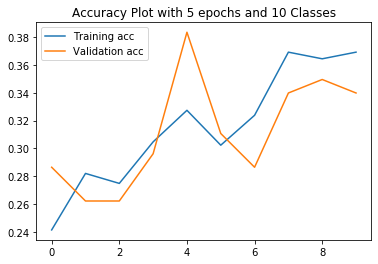

In [14]:
plt.plot(history.history['acc'], label = 'Training acc',)
plt.plot(history.history['val_acc'], label = 'Validation acc')
plt.title(f"Accuracy Plot with {epoch_num} Epochs and {train_generator.num_classes} Classes")
plt.legend();


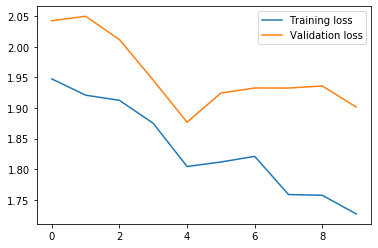

In [15]:
plt.plot(history.history['loss'], label = 'Training loss')
plt.plot(history.history['val_loss'], label = 'Validation loss')
plt.title(f"Loss Plot with {epoch_num} Epochs and {train_generator.num_classes} Classes")
plt.legend();

In [58]:
preds = model.predict_generator(val_generator)

In [59]:
y_true = val_generator.classes

In [60]:
y_preds = [np.argmax(pred) for pred in preds]

In [61]:
poses = os.listdir('../images/incoming_images/')

In [62]:
con_mat = confusion_matrix(y_true, y_preds) / val_generator.n
con_mat

array([[ 1,  1,  3,  7,  2,  1,  0,  3,  2,  7],
       [ 3,  0,  3,  2,  3,  0,  0,  2,  2,  3],
       [ 5,  0,  6,  5,  7,  1,  1,  2,  1,  6],
       [ 6,  0,  2, 10,  3,  2,  3,  0,  3,  5],
       [ 3,  1,  4,  3,  1,  0,  1,  2,  0,  4],
       [ 2,  1,  4,  5,  0,  0,  2,  2,  0,  1],
       [ 4,  2,  2,  3,  0,  0,  3,  1,  1,  3],
       [ 2,  1,  4,  1,  1,  2,  0,  1,  3,  3],
       [ 7,  0,  5,  3,  1,  3,  2,  1,  3,  5],
       [ 8,  0,  7,  3,  3,  3,  3,  0,  4,  5]])

In [63]:
import seaborn as sns

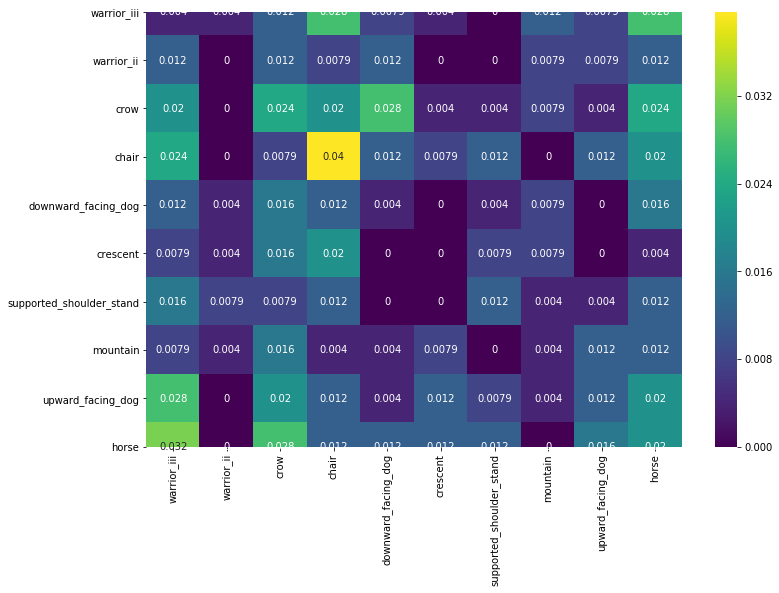

In [64]:
plt.figure(figsize=(12,8))
sns.heatmap(con_mat,
            xticklabels=poses, 
            yticklabels=poses, 
            annot=True,
            cmap='viridis');